In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pickle

In [2]:
def openPickle(fileName):
    file = open(fileName, "rb")
    data = pickle.load(file)
    file.close()
    data = np.array(data)
    return data

In [3]:
lossDataTraining = openPickle("lossDataTraining")
lossDataTestingTrue = openPickle("lossDataTestingTrue")
lossDataTestingBackground = openPickle("lossDataTestingBackground")
scores = openPickle("scores")
truth_labels = openPickle("truth_labels")

In [4]:
print(type(truth_labels))

<class 'numpy.ndarray'>


In [5]:
epoch_number = []
for i in range(1, len(lossDataTraining)+1):
    epoch_number.append(i)


In [6]:
def plotLoss(epoch_number, lossData, title):
  plt.plot(epoch_number, lossData)
  plt.xlabel("Epoch Number")
  plt.ylabel("Loss")
  plt.title(title)
  plt.show()

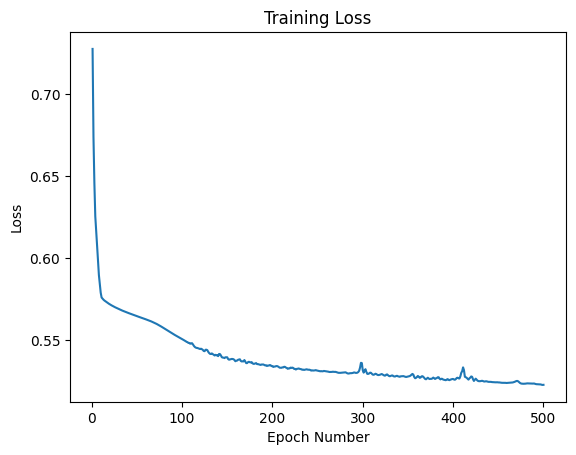

In [7]:
plotLoss(epoch_number, lossDataTraining, "Training Loss")

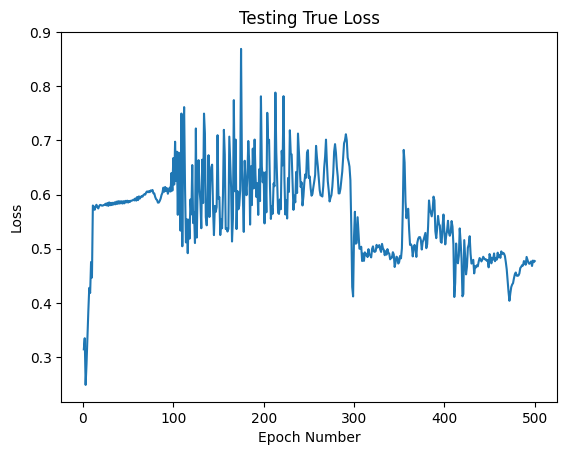

In [8]:
plotLoss(epoch_number, lossDataTestingTrue, "Testing True Loss")

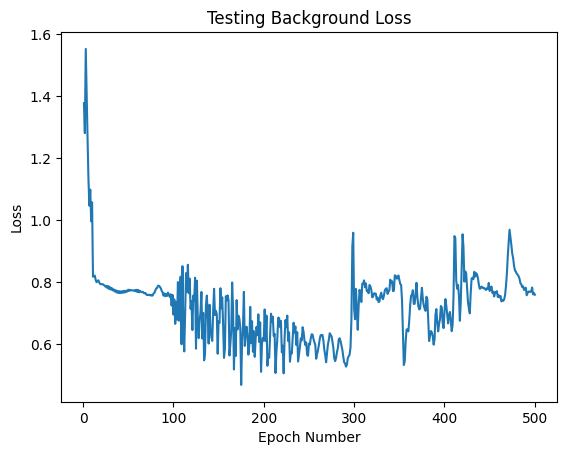

In [9]:
plotLoss(epoch_number, lossDataTestingBackground, "Testing Background Loss")

In [10]:
def plotROCCurve(epoch_scores, epoch_truth_labels, epoch_number):
    fpr, tpr, _ = roc_curve(epoch_truth_labels, epoch_scores)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color = 'darkorange', label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.legend(loc = "lower right")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for Epoch " + str(epoch_number))
    plt.show()

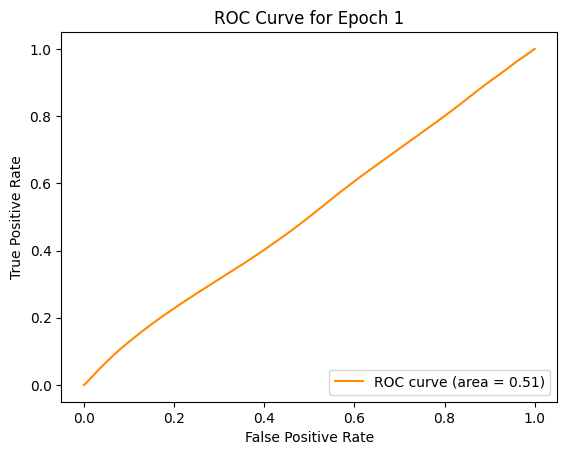

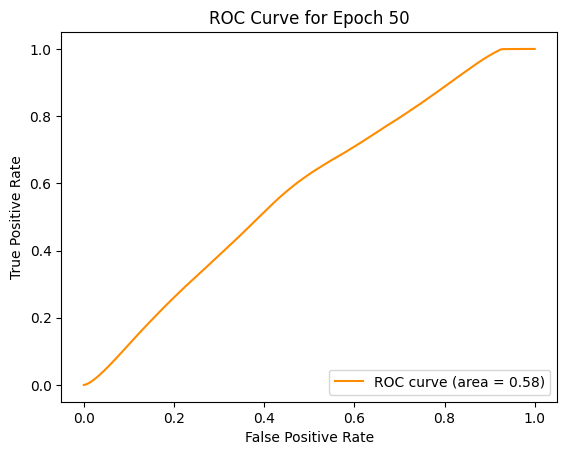

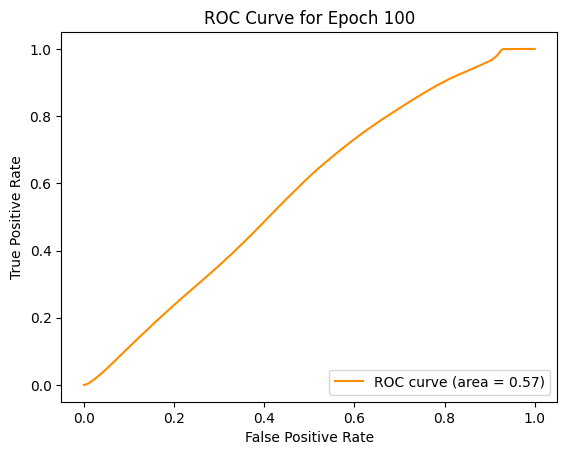

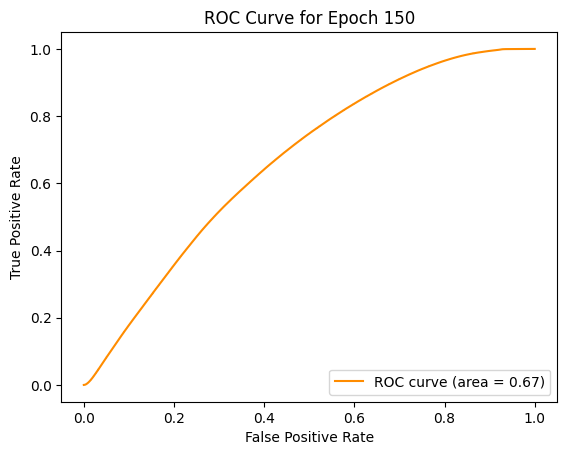

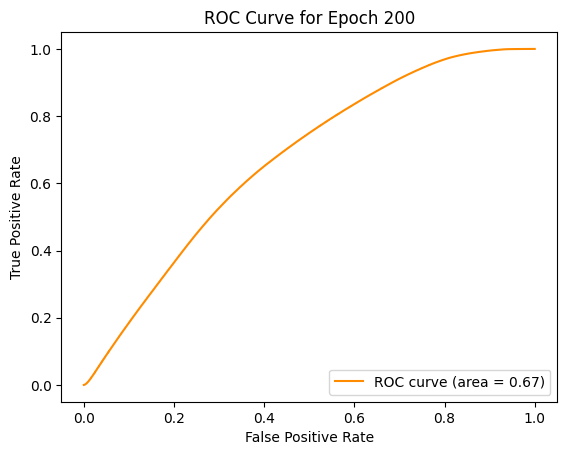

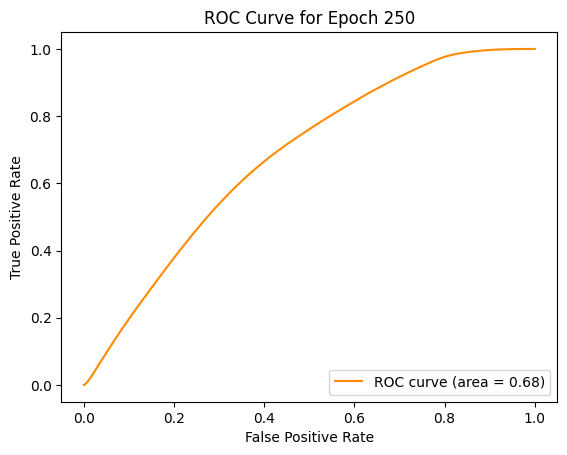

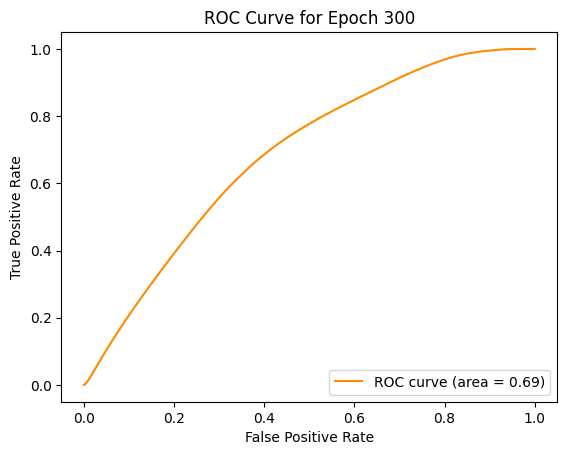

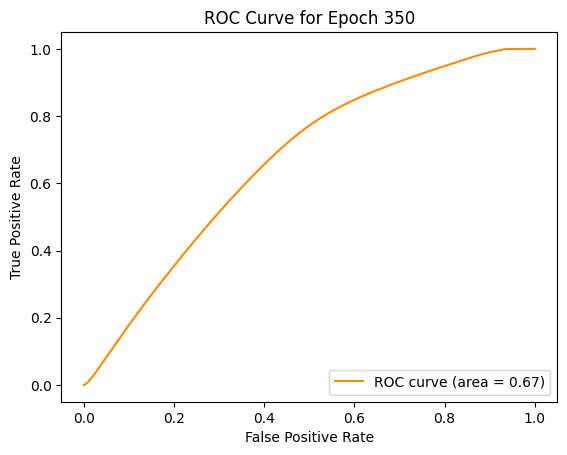

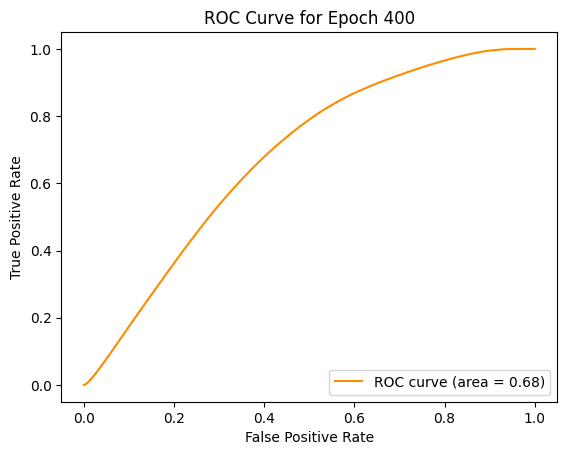

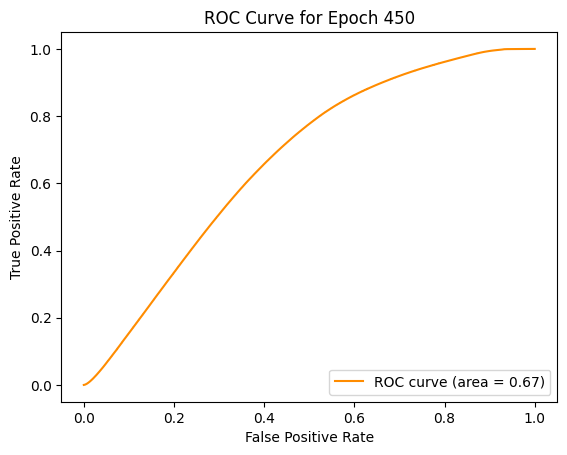

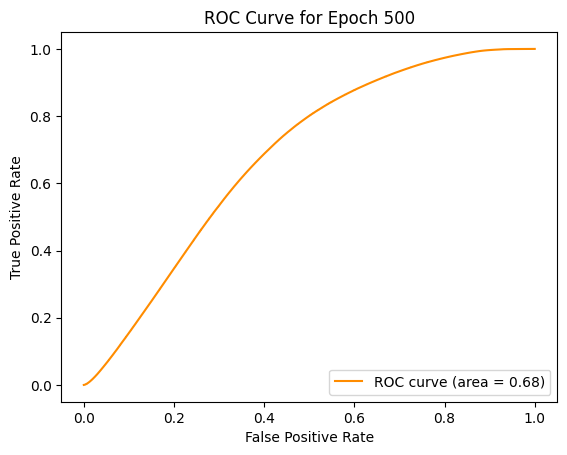

In [11]:
plotROCCurve(scores[0], truth_labels[0], 1)
for i in range(0, 500):
    if (i+1) % 50 == 0:
        plotROCCurve(scores[i], truth_labels[i], i+1)

In [12]:
def getAUC(epoch_scores, epoch_truth_labels):
    fpr, tpr, _ = roc_curve(epoch_truth_labels, epoch_scores)
    roc_auc = auc(fpr, tpr)
    return roc_auc

In [13]:
aucs = []
for i in range(0, 500):
    aucs.append(getAUC(scores[i], truth_labels[i]))
aucs = np.array(aucs)

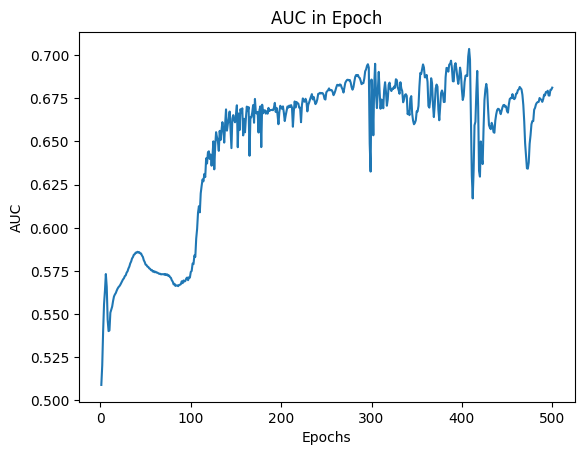

In [14]:
plt.plot(epoch_number, aucs)
plt.xlabel("Epochs")
plt.ylabel("AUC")
plt.title("AUC in Epoch")
plt.show()